In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/insurance_data.csv')

In [ ]:
df.head()

,age,gender,bmi,children,smoker,region,NoClaimsBonus,charges
0,19,female,27.900,0.0,yes,southwest,5%,16884.92400
1,18,male,33.770,1.0,no,southeast,20%,1725.55230
2,28,male,33.000,3.0,no,southeast,10%,4449.46200
3,33,male,22.705,0.0,no,northwest,5%,21984.47061
4,32,male,28.880,0.0,no,northwest,20%,3866.85520


In [ ]:
df.isnull().sum()

,0
age,0
gender,5
bmi,5
children,5
smoker,0
region,0
NoClaimsBonus,0
charges,7


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
bmi,0
children,0
smoker,0
region,0
NoClaimsBonus,0
charges,0


In [ ]:
if df['NoClaimsBonus'].dtype == 'object':
    df['NoClaimsBonus'] = df['NoClaimsBonus'].str.rstrip('%').astype(float)

In [ ]:
df['Gender_Encoded'] = df['gender'].map({'female': 0, 'male': 1})
df['Smoker_Encoded'] = df['smoker'].map({'no': 0, 'yes': 1})
df['Region_Encoded'] = pd.factorize(df['region'])[0]

In [ ]:
median_charges = df['charges'].median()
df['Price_Category'] = pd.cut(df['charges'], bins=[0, median_charges, float('inf')], labels=['Low', 'High'])
df['Price_Encoded'] = df['Price_Category'].map({'Low': 0, 'High': 1})


Text(0.5, 0, 'Age')

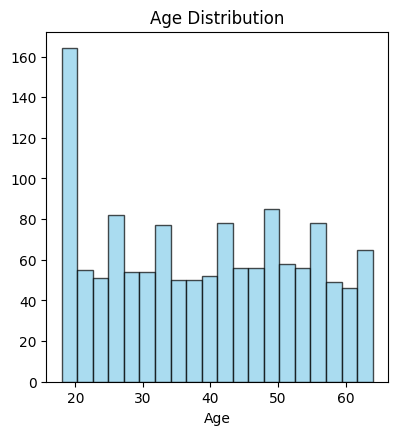

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['age'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')

Text(0.5, 0, 'BMI')

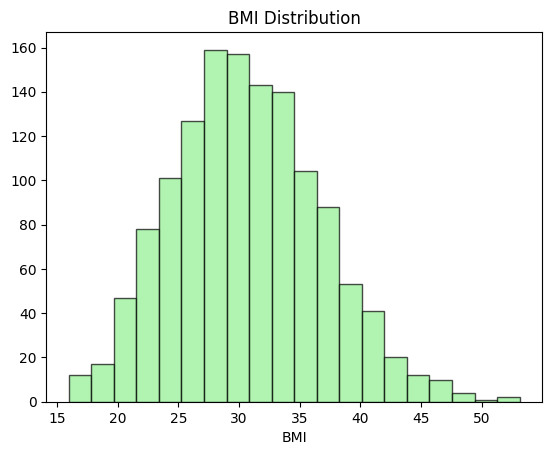

In [ ]:
plt.hist(df['bmi'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')

Text(0.5, 0, 'Charges (£)')

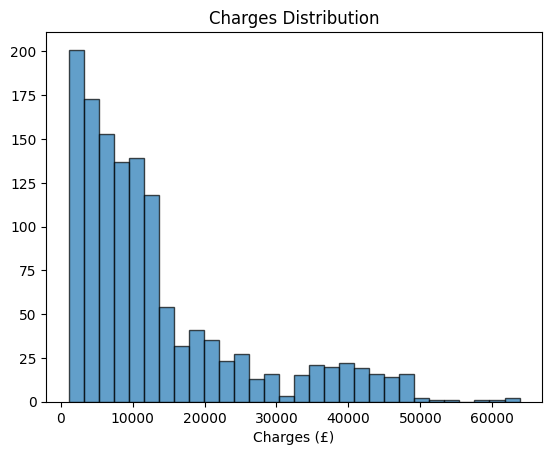

In [ ]:

plt.hist(df['charges'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Charges Distribution')
plt.xlabel('Charges (£)')

(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

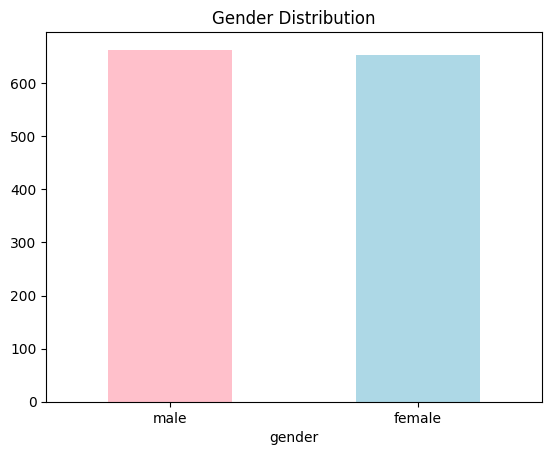

In [ ]:
df['gender'].value_counts().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Gender Distribution')
plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

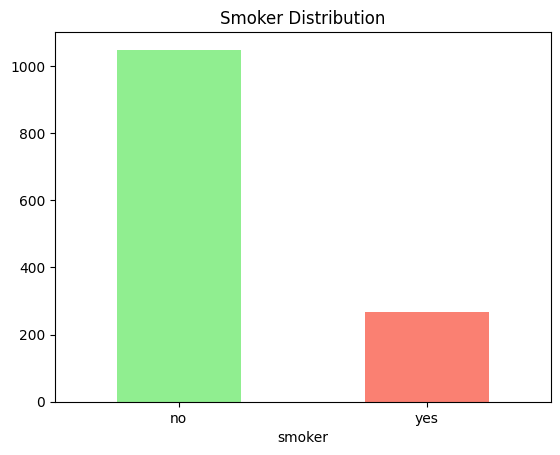

In [ ]:
df['smoker'].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title('Smoker Distribution')
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'southeast'),
  Text(1, 0, 'southwest'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast'),
  Text(4, 0, 'Southeast'),
  Text(5, 0, 'northteast')])

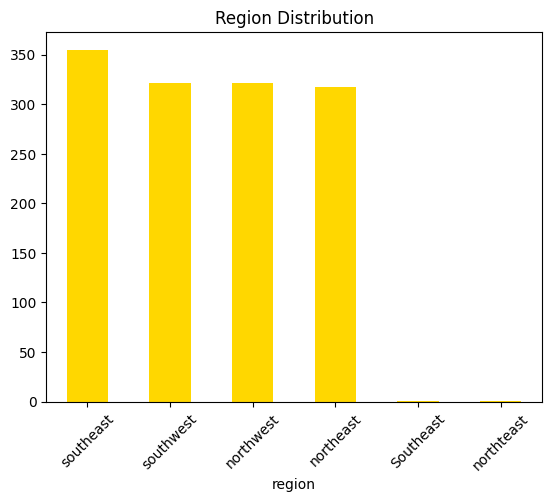

In [ ]:
df['region'].value_counts().plot(kind='bar', color='gold')
plt.title('Region Distribution')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'southeast'),
  Text(1, 0, 'southwest'),
  Text(2, 0, 'northwest'),
  Text(3, 0, 'northeast'),
  Text(4, 0, 'Southeast'),
  Text(5, 0, 'northteast')])

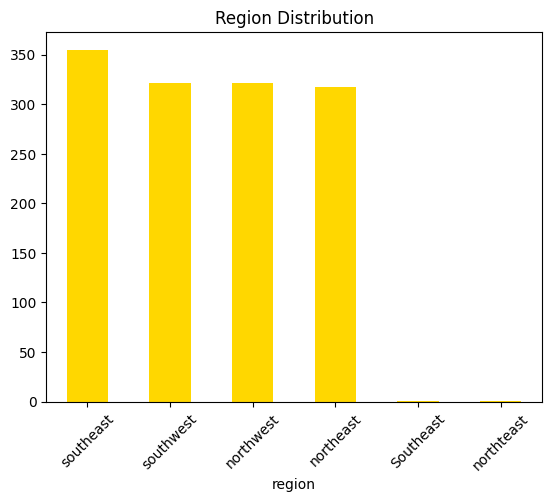

In [ ]:
df['region'].value_counts().plot(kind='bar', color='gold')
plt.title('Region Distribution')
plt.xticks(rotation=45)

In [ ]:
print(f"Average charges for smokers: £{df[df['smoker']=='yes']['charges'].mean():.2f}")
print(f"Average charges for non-smokers: £{df[df['smoker']=='no']['charges'].mean():.2f}")
print(f"Smoking premium: {(df[df['smoker']=='yes']['charges'].mean() / df[df['smoker']=='no']['charges'].mean() - 1)*100:.1f}%")


Average charges for smokers: £32070.38
Average charges for non-smokers: £8440.00
Smoking premium: 280.0%


Text(0, 0.5, 'Charges (£)')

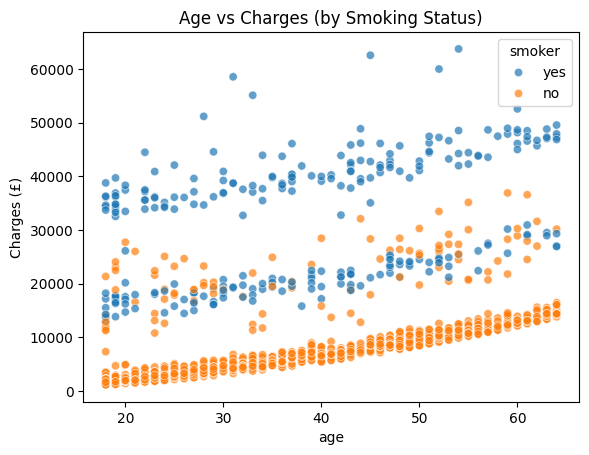

In [ ]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Age vs Charges (by Smoking Status)')
plt.ylabel('Charges (£)')

In [ ]:
X = df[['age', 'Gender_Encoded', 'bmi', 'children', 'Smoker_Encoded', 'Region_Encoded', 'NoClaimsBonus']]
y_regression = df['charges']
y_classification = df['Price_Encoded']

In [ ]:
X.shape

(1316, 7)

In [ ]:
# Split 2: 70-30
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_regression, test_size=0.3, random_state=42)

# Split 2: 80-20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Split 3: 75-25
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_regression, test_size=0.25, random_state=42)

In [ ]:
rf_reg1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg3 = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:

lr_reg1 = LinearRegression()
lr_reg2 = LinearRegression()
lr_reg3 = LinearRegression()


In [ ]:
# Train models
rf_reg1.fit(X_train1, y_train1)
rf_reg2.fit(X_train2, y_train2)
rf_reg3.fit(X_train3, y_train3)

lr_reg1.fit(X_train1, y_train1)
lr_reg2.fit(X_train2, y_train2)
lr_reg3.fit(X_train3, y_train3)


LinearRegression()

In [ ]:
rf_pred1 = rf_reg1.predict(X_test1)
rf_pred2 = rf_reg2.predict(X_test2)
rf_pred3 = rf_reg3.predict(X_test3)

lr_pred1 = lr_reg1.predict(X_test1)
lr_pred2 = lr_reg2.predict(X_test2)
lr_pred3 = lr_reg3.predict(X_test3)

In [ ]:
regression_results = []

regression_results.append(['Random Forest', '70-30', r2_score(y_test1, rf_pred1) ])
regression_results.append(['Random Forest', '80-20', r2_score(y_test2, rf_pred2) ])
regression_results.append(['Random Forest', '75-25', r2_score(y_test3, rf_pred3)])

# Linear Regression results
regression_results.append(['Linear Regression', '70-30', r2_score(y_test1, lr_pred1)])
regression_results.append(['Linear Regression', '80-20', r2_score(y_test2, lr_pred2)])
regression_results.append(['Linear Regression', '75-25', r2_score(y_test3, lr_pred3)])

# Create results dataframe
regression_df = pd.DataFrame(regression_results, columns=['Model', 'Split', 'R2_Score'])
print("Regression Results:")
print(regression_df.round(3).to_string(index=False))

Regression Results:
            Model Split  R2_Score
    Random Forest 70-30     0.844
    Random Forest 80-20     0.843
    Random Forest 75-25     0.854
Linear Regression 70-30     0.750
Linear Regression 80-20     0.758
Linear Regression 75-25     0.758


In [ ]:
print("CLASSIFICATION ANALYSIS")

CLASSIFICATION ANALYSIS


In [ ]:
X_train1_c, X_test1_c, y_train1_c, y_test1_c = train_test_split(X, y_classification, test_size=0.3, random_state=42)
X_train2_c, X_test2_c, y_train2_c, y_test2_c = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train3_c, X_test3_c, y_train3_c, y_test3_c = train_test_split(X, y_classification, test_size=0.25, random_state=42)


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_clf1.fit(X_train1_c, y_train1_c)
rf_clf2.fit(X_train2_c, y_train2_c)
rf_clf3.fit(X_train3_c, y_train3_c)

RandomForestClassifier(random_state=42)

In [ ]:
clf_pred1 = rf_clf1.predict(X_test1_c)
clf_pred2 = rf_clf2.predict(X_test2_c)
clf_pred3 = rf_clf3.predict(X_test3_c)

In [ ]:
classification_results = [
    ['Random Forest Classifier', '70-30', accuracy_score(y_test1_c, clf_pred1)],
    ['Random Forest Classifier', '80-20', accuracy_score(y_test2_c, clf_pred2)],
    ['Random Forest Classifier', '75-25', accuracy_score(y_test3_c, clf_pred3)]
]

In [ ]:
classification_df = pd.DataFrame(classification_results, columns=['Model', 'Split', 'Accuracy'])
print("Classification Results:")
print(classification_df.round(3))


Classification Results:
                      Model  Split  Accuracy
0  Random Forest Classifier  70-30     0.927
1  Random Forest Classifier  80-20     0.928
2  Random Forest Classifier  75-25     0.927


In [ ]:
param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}


grid_rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_rf_reg.fit(X_train1, y_train1)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [ ]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_rf_clf.fit(X_train1_c, y_train1_c)

print("Best parameters for regression:", grid_rf_reg.best_params_)
print("Best R2 score:", grid_rf_reg.best_score_)
print("Best parameters for classification:", grid_rf_clf.best_params_)
print("Best accuracy score:", grid_rf_clf.best_score_)

Best parameters for regression: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best R2 score: 0.8484063645126652
Best parameters for classification: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score: 0.9381257344300822


In [ ]:
k_values = [5, 10]
best_rf_reg = RandomForestRegressor(**grid_rf_reg.best_params_, random_state=42)
best_rf_clf = RandomForestClassifier(**grid_rf_clf.best_params_, random_state=42)

print("Regression Model Cross-validation:")
for k in k_values:
    scores = cross_val_score(best_rf_reg, X, y_regression, cv=k, scoring='r2')
    print(f"{k}-fold CV - Mean R2: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Regression Model Cross-validation:
5-fold CV - Mean R2: 0.8511 (+/- 0.0740)
10-fold CV - Mean R2: 0.8514 (+/- 0.0838)


In [ ]:
print("Classification Model Cross-validation:")
for k in k_values:
    scores = cross_val_score(best_rf_clf, X, y_classification, cv=k, scoring='accuracy')
    print(f"{k}-fold CV - Mean Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Classification Model Cross-validation:
5-fold CV - Mean Accuracy: 0.9339 (+/- 0.0500)
10-fold CV - Mean Accuracy: 0.9316 (+/- 0.0607)


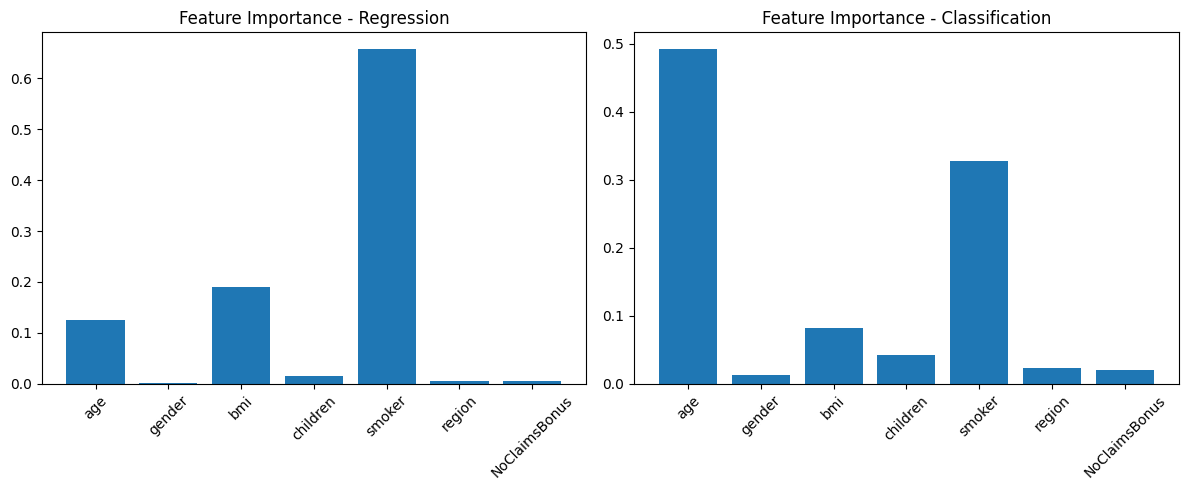

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [ ]:
feature_names = ['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'NoClaimsBonus']
importance_reg = best_rf_reg.fit(X, y_regression).feature_importances_
importance_clf = best_rf_clf.fit(X, y_classification).feature_importances_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(feature_names, importance_reg)
plt.title('Feature Importance - Regression')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(feature_names, importance_clf)
plt.title('Feature Importance - Classification')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 5))


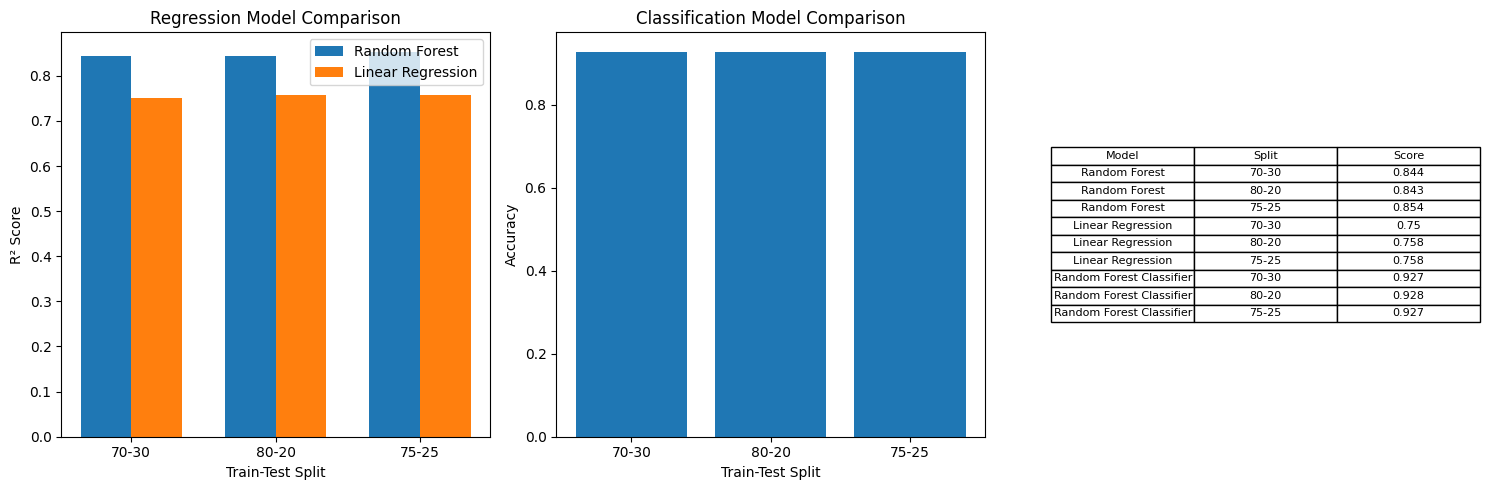

In [ ]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
models = regression_df['Model'].unique()
splits = regression_df['Split'].unique()
x_pos = np.arange(len(splits))
width = 0.35

for i, model in enumerate(models):
    model_data = regression_df[regression_df['Model'] == model]
    plt.bar(x_pos + i*width, model_data['R2_Score'], width, label=model)

plt.xlabel('Train-Test Split')
plt.ylabel('R² Score')
plt.title('Regression Model Comparison')
plt.xticks(x_pos + width/2, splits)
plt.legend()


plt.subplot(1, 3, 2)
plt.bar(classification_df['Split'], classification_df['Accuracy'])
plt.xlabel('Train-Test Split')
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison')

plt.subplot(1, 3, 3)
plt.axis('tight')
plt.axis('off')
combined_table = pd.concat([
    regression_df[['Model', 'Split', 'R2_Score']].rename(columns={'R2_Score': 'Score'}),
    classification_df[['Model', 'Split', 'Accuracy']].rename(columns={'Accuracy': 'Score'})
])
table = plt.table(cellText=combined_table.round(3).values,
                 colLabels=combined_table.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.tight_layout()
plt.show()